In [35]:
# import the modules
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score , roc_auc_score
from scipy.stats import skew
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [36]:
# Code starts here
train = pd.read_csv("train.csv")

# drop serial number
train.drop(columns=['Id'],inplace=True)
train.head()

# Code ends here

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,38,Travel_Rarely,330,Research & Development,17,1,Life Sciences,1,1088,3,...,80,1,20,4,2,19,9,1,9,No
1,36,Non-Travel,1351,Research & Development,9,4,Life Sciences,1,1949,1,...,80,0,5,3,3,5,4,0,2,No
2,29,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,1,94,3,...,80,1,6,3,3,5,4,0,4,No
3,47,Travel_Rarely,1180,Research & Development,25,3,Medical,1,1993,1,...,80,0,25,3,3,17,14,12,11,No
4,54,Travel_Rarely,584,Research & Development,22,5,Medical,1,1665,2,...,80,1,36,6,3,10,8,4,7,No


In [37]:
train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.0,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,...,1281.000000,1281.0,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,36.451991,803.854801,9.513661,2.892272,1.0,1026.784543,2.697892,66.149102,2.715066,2.036690,...,2.684621,80.0,0.768150,10.966432,2.773614,2.749415,6.820453,4.110070,2.169399,4.009368
std,9.182920,405.180946,8.261545,1.042508,0.0,594.530378,1.107533,20.448039,0.731543,1.108658,...,1.093513,0.0,0.849697,7.783173,1.260068,0.715106,6.157865,3.590513,3.182992,3.538393
min,18.000000,104.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,464.000000,2.000000,2.000000,1.0,497.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,35.000000,805.000000,7.000000,3.000000,1.0,1026.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,1162.000000,15.000000,4.000000,1.0,1548.000000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1498.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

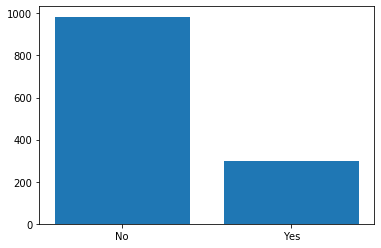

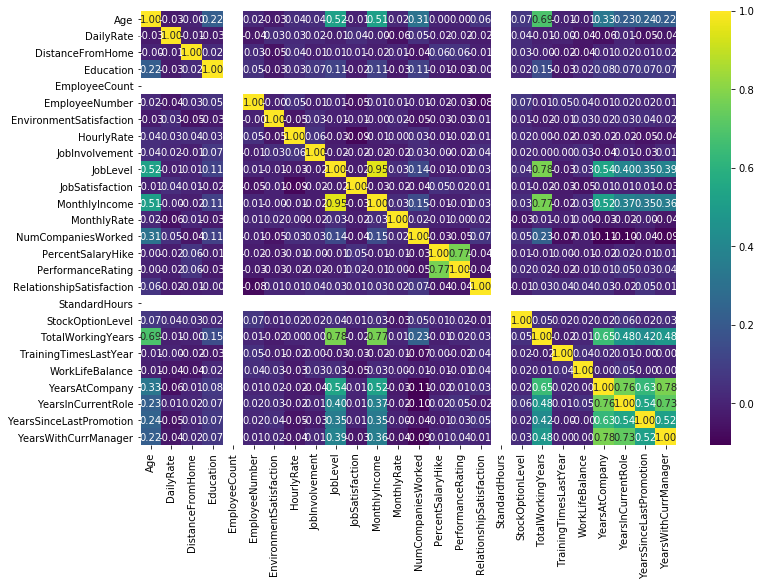

In [38]:
# Code starts here

# Check the distribution of the target variable

#Storing value counts of target variable in 'fully_paid'
attrition=train['Attrition'].value_counts()

#Plotting bar plot
plt.bar(attrition.index, attrition)
plt.show()

# Check the correlation between the features
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap='viridis',annot=True, fmt='.2f')

In [39]:
# EmployeeCount and StandardHours has only 1 unique value
train['EmployeeCount'].nunique(), train['StandardHours'].nunique()

(1, 1)

In [40]:
#Drop redundant & highly correlated features
train.drop(columns = ['EmployeeCount', 'StandardHours', 'YearsWithCurrManager', 'YearsInCurrentRole', 'PerformanceRating', 'JobLevel', 'TotalWorkingYears'], inplace = True)

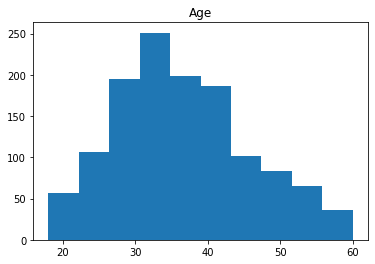

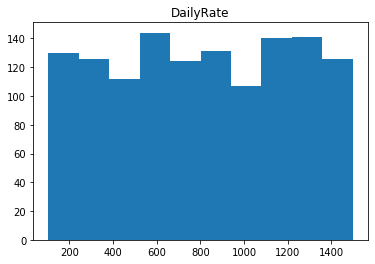

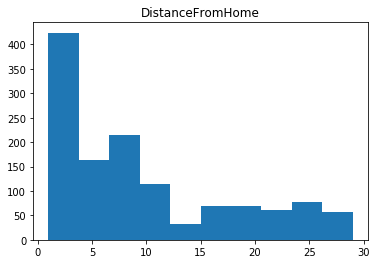

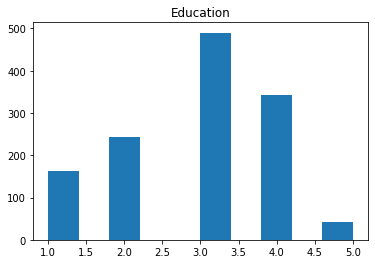

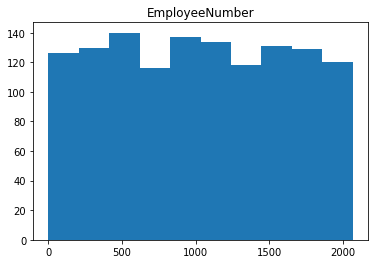

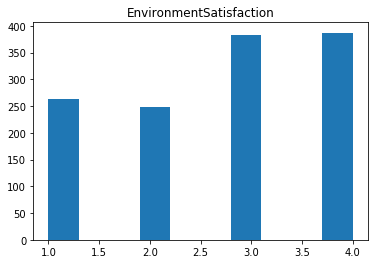

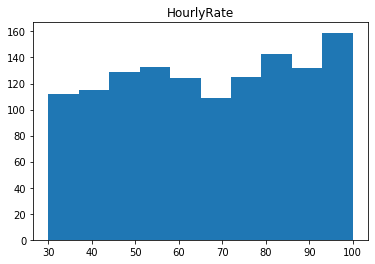

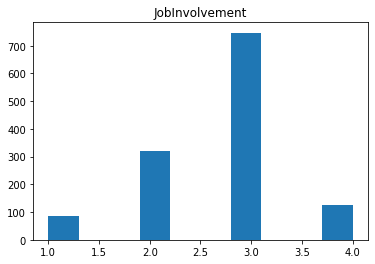

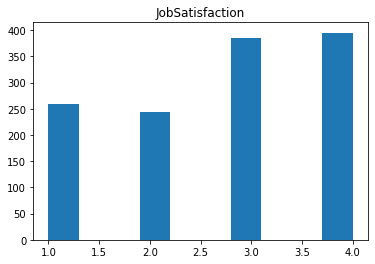

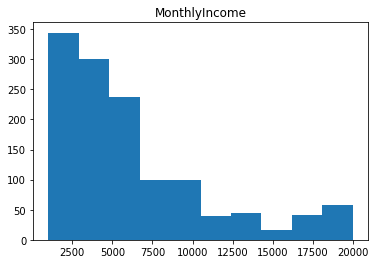

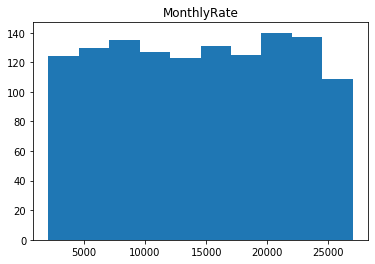

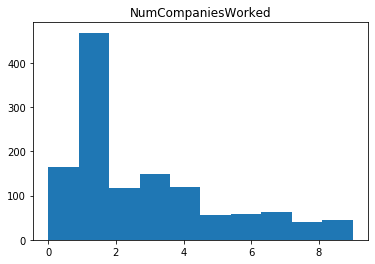

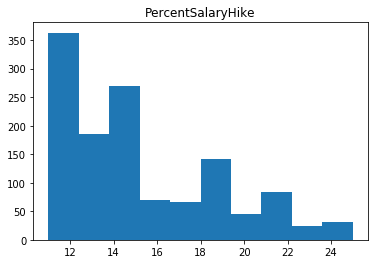

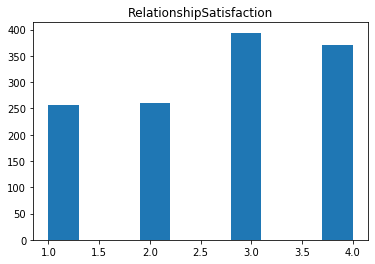

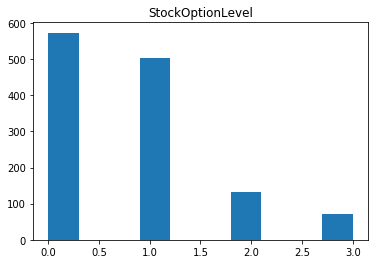

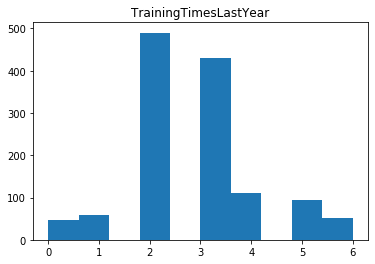

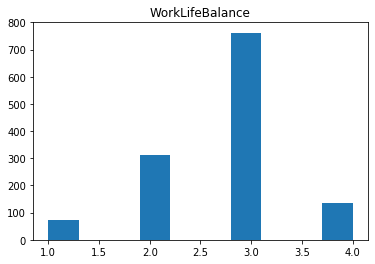

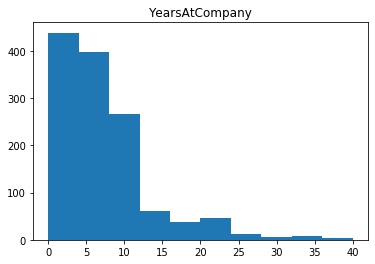

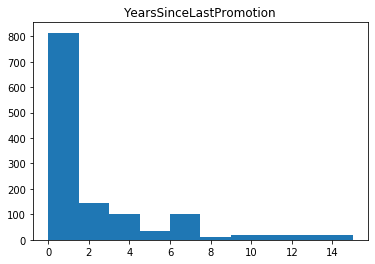

In [41]:
# Check the distribution of the continuous features

numeric_feature_auto = train._get_numeric_data().columns
for i in numeric_feature_auto:
    plt.title(i)
    plt.hist(train[i])
    plt.show()

In [42]:
# Code the Attrition column - Yes:1 and No:0

train['Attrition'].replace({'Yes':1, 'No':0},inplace=True)

# Dependent variable
y = train['Attrition']

# Independent variable
X = train.drop(columns=['Attrition'])

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Make a copy of the train data to perform the operation on the test data
X_train_ = X_train.copy()

In [43]:
column = X_train.select_dtypes(include = ['object']).columns

# Label Encode the categorical columns

for col in column:
    # Instantiate label encoder
    le = LabelEncoder()
    # fit and transform label encoder on train
    X_train[col]=le.fit_transform(X_train[col].astype(str))
    # transform label encoder on X_test
    X_test[col]=le.transform(X_test[col].astype(str))
    

# Transform the skewed columns

for feature in numeric_feature_auto:
    if skew(X_train[feature])>1:
        X_train[feature] = np.sqrt(X_train[feature])
        

# Standardize the data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model building

- Now let's come to the actual task, using Decision Tree/Ensemble Technique, predict the `Attrition`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the [ROC-AUC Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

In [44]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier

model1 = DecisionTreeClassifier()
model2 = LogisticRegression()

model = VotingClassifier(estimators=[('dt', model1), ('lr', model2)], voting='soft')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
roc_auc_score(y_test,y_pred)

0.5667955326460481

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Parameter grid
parameter_grid = {"max_depth": [4, None],
              "max_features": [1, 7, 10],
              "min_samples_split": [2, 7, 10],
              "min_samples_leaf": [1, 7, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

clf= RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(clf, param_grid=parameter_grid)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, None], 'max_features': [1, 7, 10],
                         'min_samples_leaf': [1, 7, 10],
                         'min_samples_split': [2, 7, 10]})

In [46]:
y_pred = grid_search.predict(X_test)
roc_auc_score(y_test,y_pred)

0.6734679266895762

In [47]:
# # Code Starts here

# model = GradientBoostingClassifier(n_estimators=150, max_depth=5, random_state=42).fit(X_train,y_train)
# y_pred = model.predict(X_test)
# recall_score(y_test,y_pred), roc_auc_score(y_test,y_pred)

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [48]:
# Code Starts here
# Prediction on test data

# Read the test data
test = pd.read_csv('test.csv')

# Storing the id from the test file
id_ = test['Id']

test.drop(columns=['Id'],inplace=True)

# Apply the transformations on test
test.drop(columns = ['EmployeeCount', 'StandardHours', 'YearsWithCurrManager', 'YearsInCurrentRole', 'PerformanceRating', 
                      'JobLevel', 'TotalWorkingYears'], inplace = True)

column = test.select_dtypes(include = ['object']).columns

for col in column:
    # Instantiate label encoder
    le = LabelEncoder()
    # fit and transform label encoder on train
    X_train_[col] = le.fit_transform(X_train_[col].astype(str))
    # transform label encoder on X_test
    test[col]=le.transform(test[col].astype(str))
    
numeric_feature_auto = X_train_._get_numeric_data().columns

for feature in numeric_feature_auto:
    if skew(X_train_[feature])>1:
        test[feature] = np.sqrt(test[feature])    
        
# Standardize the data
scaler = MinMaxScaler()
scaler.fit(X_train_)
test = scaler.transform(test)
    
    
# Predict on the test data
y_pred_test = grid_search.predict(test)
y_pred_test = y_pred_test.flatten()

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Attrition':y_pred_test})


# Replacing the values of sample_submission
sample_submission.replace({1:'Yes', 0: 'No'},inplace=True)

# Convert the sample submission file into a csv file
# sample_submission.to_csv('sample_submission.csv',index=False)

# Code ends here